In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from ape import chain, Contract, networks

In [4]:
networks.parse_network_choice('ethereum:mainnet:alchemy').__enter__()

<alchemy chain_id=1>

In [5]:
PATH = "../scripts/results/GearboxV2STETHRunner_backtest_14805946_15078047_300.csv"

In [6]:
df = pd.read_csv(PATH)

In [7]:
df

,number,value,ETH / USD,STETH / ETH ETH/USD Composite
0,14805947,11072,202366500000,199169368964
1,14806247,11054,201149072419,197648495562
2,14806547,11054,201535000000,198027706884
3,14806847,11054,200191076762,196707171806
4,14807147,11054,201069115000,197569929633
...,...,...,...,...
903,15076847,10880,111168298220,107515743720
904,15077147,10880,110537166589,106905348600
905,15077447,10880,112033207810,108352235771
906,15077747,10880,112203000000,108516449255


In [11]:
# adjust for decimals to make calcs/plots easier
df['value_float'] = df['value'].astype(float) / 1e4
df['ETH-USD_float'] = df['ETH / USD'].astype(float) / 1e8
df['STETH-USD_float'] = df['STETH / ETH ETH/USD Composite'].astype(float) / 1e8

In [17]:
# calc STETH/ETH pair prices with ETH quote to make plots easier
df['STETH-ETH_float'] = df['STETH / ETH ETH/USD Composite'].astype(float) / df['ETH / USD'].astype(float)

In [18]:
df

,number,value,ETH / USD,STETH / ETH ETH/USD Composite,value_float,ETH-USD_float,STETH-USD_float,STETH-ETH_float
0,14805947,11072,202366500000,199169368964,1.1072,2023.665000,1991.693690,0.984201
1,14806247,11054,201149072419,197648495562,1.1054,2011.490724,1976.484956,0.982597
2,14806547,11054,201535000000,198027706884,1.1054,2015.350000,1980.277069,0.982597
3,14806847,11054,200191076762,196707171806,1.1054,2001.910768,1967.071718,0.982597
4,14807147,11054,201069115000,197569929633,1.1054,2010.691150,1975.699296,0.982597
...,...,...,...,...,...,...,...,...
903,15076847,10880,111168298220,107515743720,1.0880,1111.682982,1075.157437,0.967144
904,15077147,10880,110537166589,106905348600,1.0880,1105.371666,1069.053486,0.967144
905,15077447,10880,112033207810,108352235771,1.0880,1120.332078,1083.522358,0.967144
906,15077747,10880,112203000000,108516449255,1.0880,1122.030000,1085.164493,0.967144


<AxesSubplot: xlabel='number'>

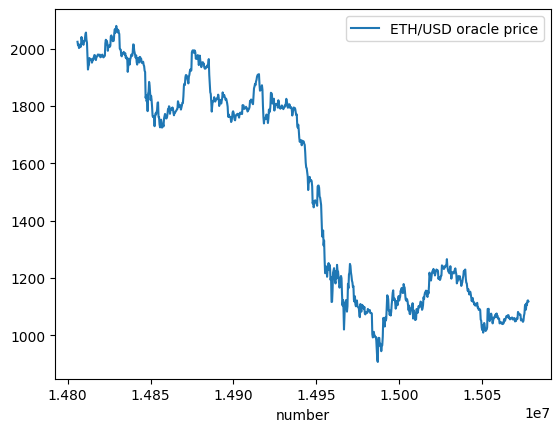

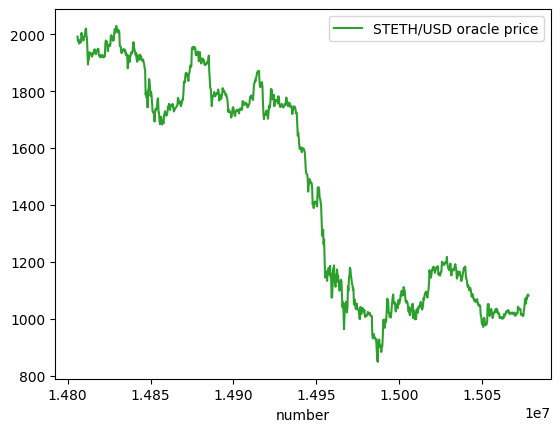

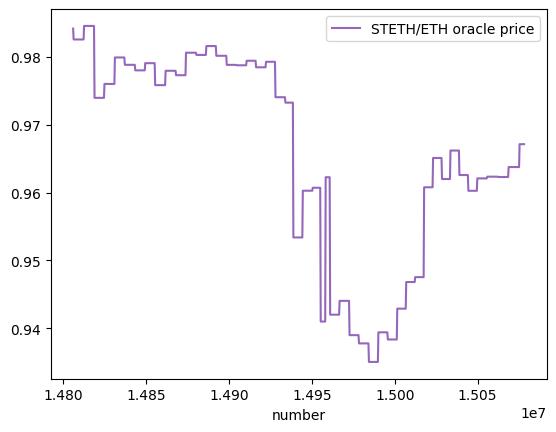

In [27]:
# plot prices of ETH, STETH from chainlink oralces over data interval above
df.plot(x='number', y='ETH-USD_float', label='ETH/USD oracle price', color='C0')
df.plot(x='number', y='STETH-USD_float', label='STETH/USD oracle price', color='C2')
df.plot(x='number', y='STETH-ETH_float', label='STETH/ETH oracle price', color='C4')

<AxesSubplot: xlabel='number'>

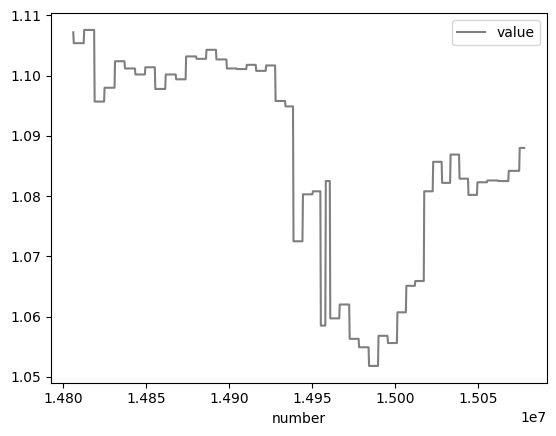

In [28]:
# plot value of health factor over same time (5x leverage position)
df.plot(x='number', y='value_float', label='value', color='C7')

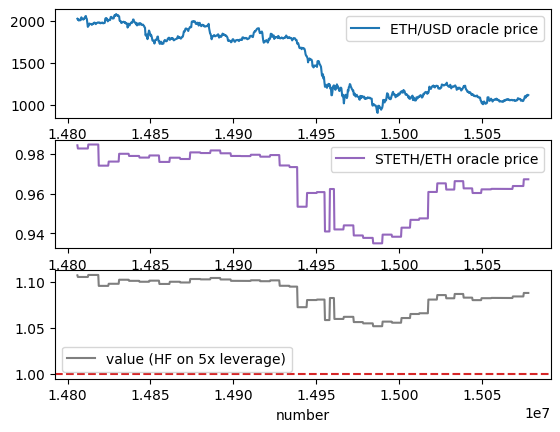

In [39]:
# plot as subplots
fig, ax = plt.subplots(3, 1)
df.plot(x='number', y='ETH-USD_float', label='ETH/USD oracle price', color='C0', ax=ax[0])
df.plot(x='number', y='STETH-ETH_float', label='STETH/ETH oracle price', color='C4', ax=ax[1])
df.plot(x='number', y='value_float', label='value (HF on 5x leverage)', color='C7', ax=ax[2])

# plot a h line at HF = 1 which is liquidation threshold for position
ax[2].axhline(1.0, color='C3', linestyle='--', label='HF = 1 (liquidation threshold)')

fig.savefig('./assets/gearbox/v2/steth.png')